In [7]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets, transforms

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

#import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")

# Define transform to normalize data
from torchvision.datasets import ImageFolder
transform = transforms.Compose([
    #transforms.Grayscale(1),
    transforms.Resize(64),
    transforms.ToTensor()
])  
DATA_PATH = '~/Data/mnist'

dataset = datasets.MNIST(root=DATA_PATH, download=True,
                     transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=300,
                                         shuffle=True, num_workers=2)


In [8]:
training_data = enumerate(dataloader)
batch_idx, (images, labels) = next(training_data)
print(type(images)) # Checking the datatype 
print(images.shape) # the size of the image
print(labels.shape) # the size of the labels

<class 'torch.Tensor'>
torch.Size([300, 1, 64, 64])
torch.Size([300])


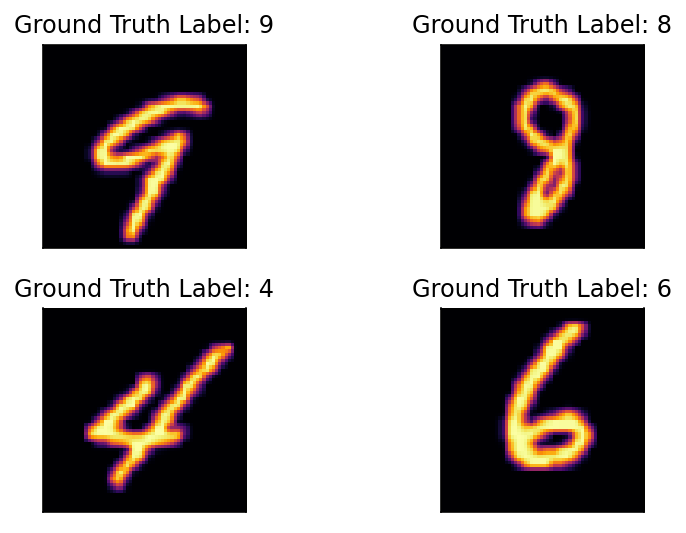

In [9]:
import os    
fig = plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='inferno')
    plt.title("Ground Truth Label: {}".format(labels[i]))
    plt.yticks([])
    plt.xticks([])

In [10]:
class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutional_neural_network_layers = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2),
                nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=1, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2),
                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2),
                nn.Conv2d(in_channels=24, out_channels=36, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2),
                nn.Flatten(),
                nn.Linear(in_features=36*4*4, out_features=64),          
                nn.ReLU(),
                nn.Dropout(p=0.2),
                nn.Linear(in_features=64, out_features=10)
        )
    def forward(self, x):
        x = self.convolutional_neural_network_layers(x)
        return x

In [11]:
model = Network()
model.to(device)

Network(
  (convolutional_neural_network_layers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(24, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=576, out_features=64, bias=True)
    (14): ReLU()
    (15): Dropout(p=0.2, inplace=False)
    (16): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=256,
                                             shuffle=True, num_workers=2)

In [15]:
epochs = 25
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []
from tqdm.notebook import tqdm

for epoch in tqdm(range(epochs)):
    
    total_train_loss = 0
    model.train()
    total = 0
    # training our model
    for idx, (image, label) in enumerate(dataloader):

        image, label = image.to(device), label.to(device)

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
    accuracy_train = total / len(dataset)
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    if epoch % 2 == 0:
        print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train))


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0/25   Training loss: 1.9399   Train accuracy: 0.4139  
Epoch: 2/25   Training loss: 0.3708   Train accuracy: 0.8833  
Epoch: 4/25   Training loss: 0.2264   Train accuracy: 0.9292  
Epoch: 6/25   Training loss: 0.1680   Train accuracy: 0.9486  
Epoch: 8/25   Training loss: 0.1381   Train accuracy: 0.9580  
Epoch: 10/25   Training loss: 0.1203   Train accuracy: 0.9633  
Epoch: 12/25   Training loss: 0.1065   Train accuracy: 0.9675  
Epoch: 14/25   Training loss: 0.0956   Train accuracy: 0.9706  
Epoch: 16/25   Training loss: 0.0870   Train accuracy: 0.9735  
Epoch: 18/25   Training loss: 0.0822   Train accuracy: 0.9745  
Epoch: 20/25   Training loss: 0.0778   Train accuracy: 0.9763  
Epoch: 22/25   Training loss: 0.0732   Train accuracy: 0.9768  
Epoch: 24/25   Training loss: 0.0694   Train accuracy: 0.9785  


In [16]:
torch.save(model.state_dict(), 'best_gan_weights/classifier_mnist.pth')

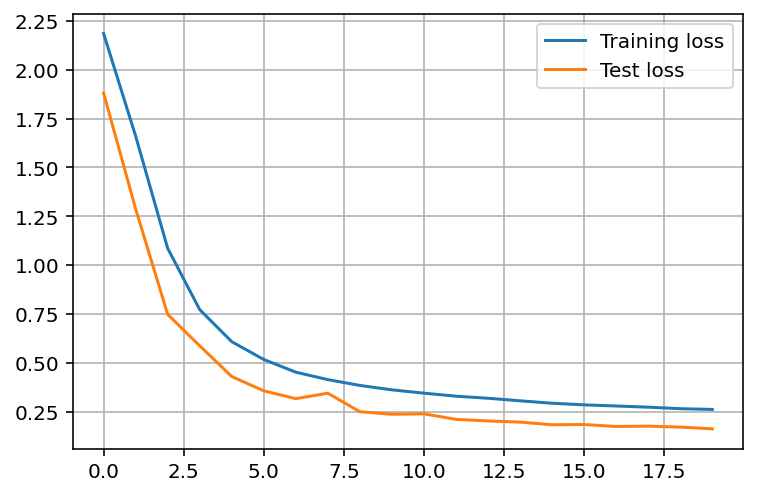

In [9]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()